# **Proyek Machine Learning untuk Prediksi Diabetes**
### Nama: Muhammad Rizki
### Email: mrizki135790@gmail.com

## Persiapan

In [2]:
# Mengimpor Library yang Diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Menyiapkan autentikasi Kaggle
!pip install -q kaggle

# Upload file kaggle.json
from google.colab import files
uploaded = files.upload()

# Memindahkan file kaggle.json ke lokasi yang tepat
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Mengunduh Dataset dari Kaggle
!kaggle datasets download -d uciml/pima-indians-diabetes-database
!unzip pima-indians-diabetes-database.zip


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


# 1. Pendahuluan

## 1.1 Latar Belakang
Diabetes merupakan salah satu penyakit kronis yang semakin banyak diderita oleh penduduk dunia.
Menurut data Organisasi Kesehatan Dunia (WHO), terdapat sekitar 422 juta orang di dunia yang menderita diabetes,
dan angka ini terus meningkat setiap tahunnya. Komplikasi dari diabetes dapat menyebabkan berbagai masalah kesehatan
serius seperti penyakit jantung, gagal ginjal, kebutaan, dan bahkan kematian.

Deteksi dini diabetes sangat penting untuk pengelolaan dan pencegahan komplikasi penyakit.
Dengan kemajuan teknologi machine learning, kita dapat mengembangkan model prediktif yang membantu
mengidentifikasi individu yang berisiko terkena diabetes berdasarkan faktor-faktor klinis tertentu.

Proyek ini bertujuan untuk mengembangkan model machine learning yang dapat memprediksi kemungkinan seorang individu
mengidap diabetes berdasarkan berbagai parameter klinis. Dataset yang digunakan adalah "Pima Indians Diabetes Database",
yang berisi informasi medis dari populasi penduduk asli Amerika (Pima Indians).

## 1.2 Pernyataan Masalah
Permasalahan utama yang ingin diselesaikan dalam proyek ini adalah:
1. Bagaimana kita dapat memprediksi apakah seseorang menderita diabetes berdasarkan faktor-faktor klinis?
2. Faktor klinis apa yang memiliki pengaruh terbesar terhadap kemungkinan seseorang menderita diabetes?
3. Model machine learning apa yang paling efektif untuk memprediksi diabetes dengan tingkat akurasi yang tinggi?

## 1.3 Tujuan
Tujuan dari proyek ini adalah:
1. Mengembangkan model klasifikasi yang dapat memprediksi apakah seseorang menderita diabetes dengan akurasi tinggi
2. Mengidentifikasi faktor-faktor klinis yang paling berpengaruh terhadap perkembangan diabetes
3. Menyediakan alat prediktif yang dapat membantu tenaga medis dalam melakukan deteksi dini diabetes
4. Membandingkan performa berbagai algoritma machine learning dalam mengklasifikasikan kasus diabetes

## 1.4 Solusi yang Diusulkan
Untuk menyelesaikan permasalahan ini, beberapa langkah akan dilakukan:
1. Melakukan eksplorasi data untuk memahami karakteristik dataset
2. Melakukan pra-pemrosesan data termasuk penanganan nilai yang hilang dan normalisasi fitur
3. Mengembangkan dan membandingkan beberapa model klasifikasi seperti Logistic Regression, Decision Tree, Random Forest, dan Gradient Boosting
4. Menerapkan teknik SMOTE untuk menangani ketidakseimbangan kelas
5. Melakukan tuning hyperparameter untuk meningkatkan performa model
6. Mengevaluasi model menggunakan metrik yang sesuai seperti accuracy, precision, recall, F1-score, dan ROC-AUC

Proyek ini diharapkan dapat memberikan wawasan penting tentang faktor-faktor risiko diabetes dan menghasilkan model
prediktif yang dapat digunakan untuk membantu deteksi dini penyakit ini.

# 2. Data Understanding

## 2.1 Sumber Data
Dataset yang digunakan dalam proyek ini adalah 'Pima Indians Diabetes Database' yang tersedia di platform Kaggle.
Dataset ini berisi data medis dari 768 wanita dari populasi asli Amerika (Pima Indians).
Data ini dikumpulkan oleh National Institute of Diabetes and Digestive and Kidney Diseases.

Populasi Pima Indians dipilih karena mereka memiliki tingkat prevalensi diabetes yang tinggi, sehingga menjadi
subjek penelitian yang baik untuk studi tentang penyakit ini.


## 2.2 Membaca Data

In [4]:
df = pd.read_csv('diabetes.csv')

# Menampilkan 5 data pertama untuk melihat struktur dataset
print("Contoh data:")
df.head()

Contoh data:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2.3 Informasi Data
Dataset ini terdiri dari 768 baris data dan 9 kolom. Setiap baris mewakili satu pasien, dan setiap kolom
mewakili variabel berikut:

In [8]:
# Menampilkan informasi tentang dataset
print("\nInformasi dataset:")
df.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# Deskripsi statistik data
print("\nDeskripsi statistik data:")
df.describe()


Deskripsi statistik data:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2.4 Pengecekan Nilai yang Hilang
Mari kita periksa apakah terdapat nilai yang hilang (missing values) dalam dataset.

In [10]:
# Memeriksa nilai yang hilang
print("\nJumlah nilai yang hilang per kolom:")
df.isnull().sum()


Jumlah nilai yang hilang per kolom:


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## 2.5 Deskripsi Variabel
Berikut adalah deskripsi dari setiap variabel dalam dataset:

1. **Pregnancies**: Jumlah kehamilan yang pernah dialami
2. **Glucose**: Konsentrasi glukosa plasma pada tes toleransi glukosa oral (mg/dL)
3. **BloodPressure**: Tekanan darah diastolik (mm Hg)
4. **SkinThickness**: Ketebalan lipatan kulit trisep (mm)
5. **Insulin**: Insulin serum 2 jam (mu U/ml)
6. **BMI**: Indeks Massa Tubuh (berat dalam kg/(tinggi dalam m)²)
7. **DiabetesPedigreeFunction**: Fungsi riwayat diabetes keluarga (skor)
8. **Age**: Usia (tahun)
9. **Outcome**: Variabel target yang menunjukkan apakah pasien terkena diabetes (1) atau tidak (0)


## 2.6 Distribusi Kelas Target
Mari kita periksa distribusi kelas target (Outcome) untuk melihat apakah dataset seimbang atau tidak.


Distribusi kelas target:
Outcome
0    500
1    268
Name: count, dtype: int64


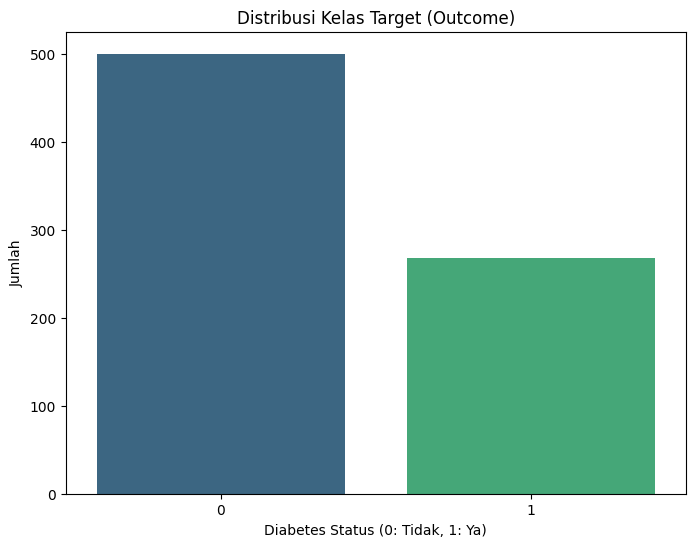


Persentase distribusi kelas target:
Outcome
0    65.1
1    34.9
Name: count, dtype: float64


In [11]:
# Menghitung jumlah sampel untuk setiap kelas
target_counts = df['Outcome'].value_counts()
print("\nDistribusi kelas target:")
print(target_counts)

# Visualisasi distribusi kelas target
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df, palette='viridis')
plt.title('Distribusi Kelas Target (Outcome)')
plt.xlabel('Diabetes Status (0: Tidak, 1: Ya)')
plt.ylabel('Jumlah')
plt.show()

# Persentase distribusi
print("\nPersentase distribusi kelas target:")
print(round(target_counts / len(df) * 100, 2))

## 2.7 Analisis Univariat
Mari kita lihat distribusi setiap fitur untuk memahami karakteristiknya.


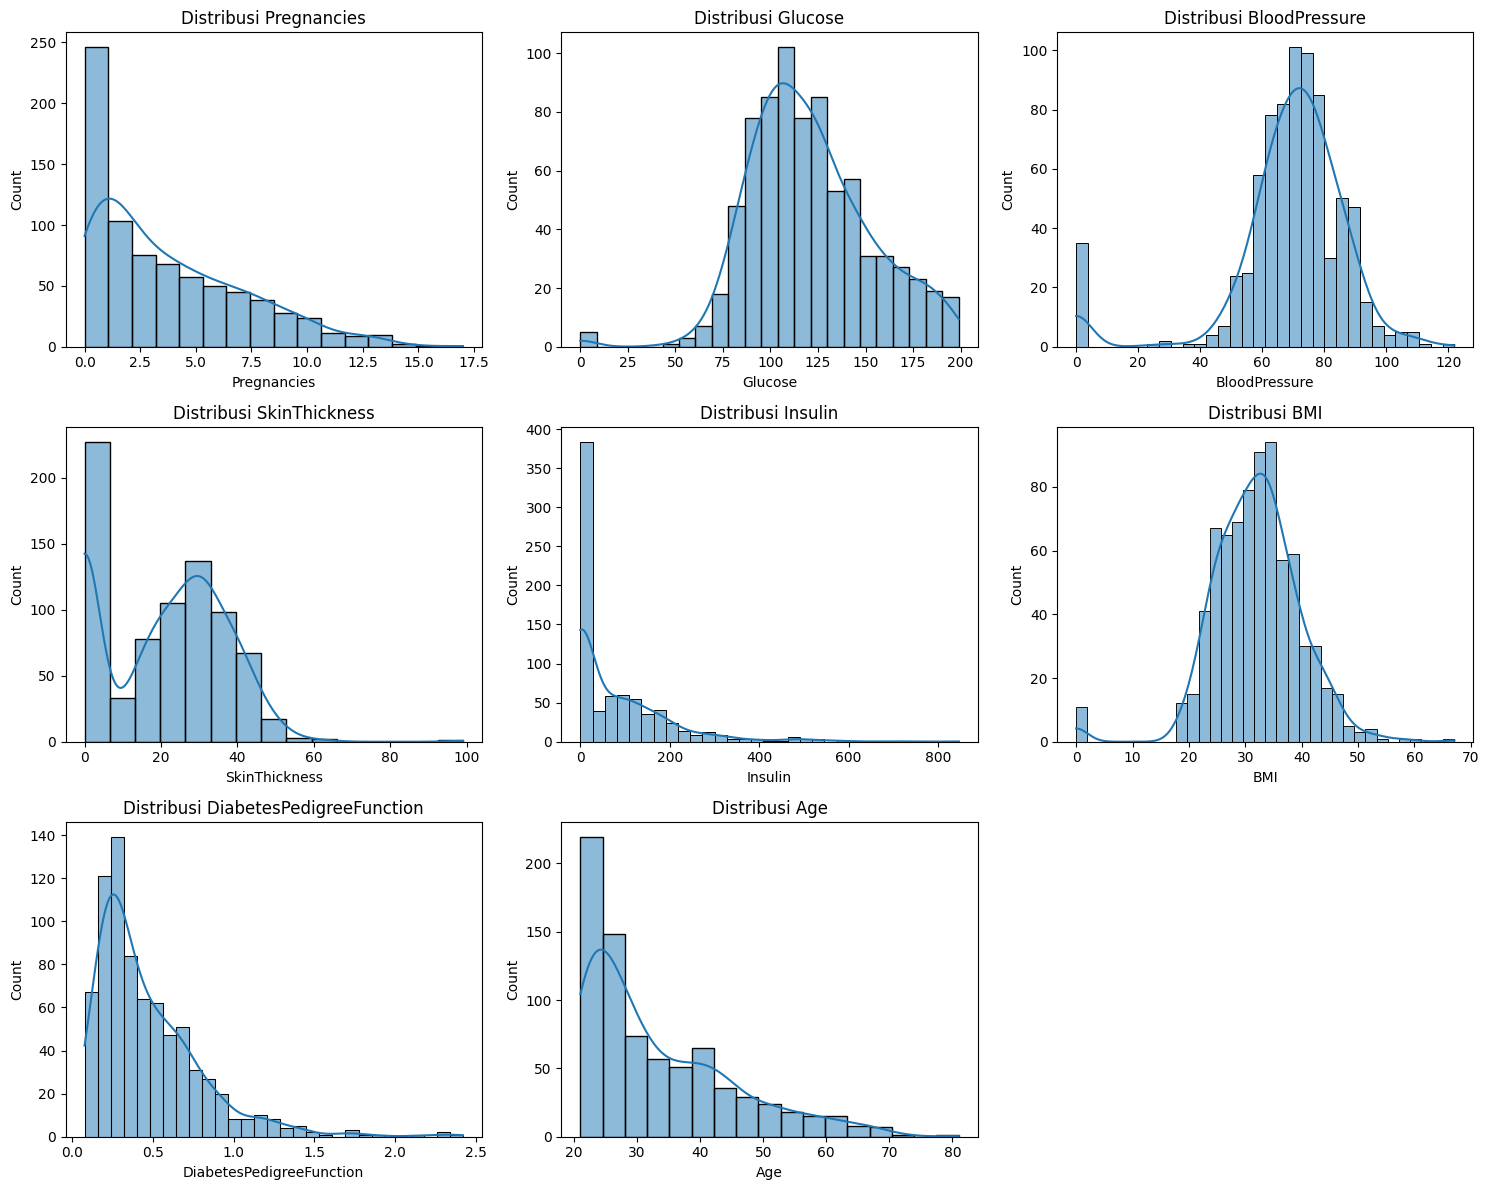

In [12]:
# Visualisasi distribusi fitur-fitur numerik
plt.figure(figsize=(15, 12))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

## 2.8 Analisis Outliers
Mari kita identifikasi outlier dalam setiap fitur menggunakan boxplot.

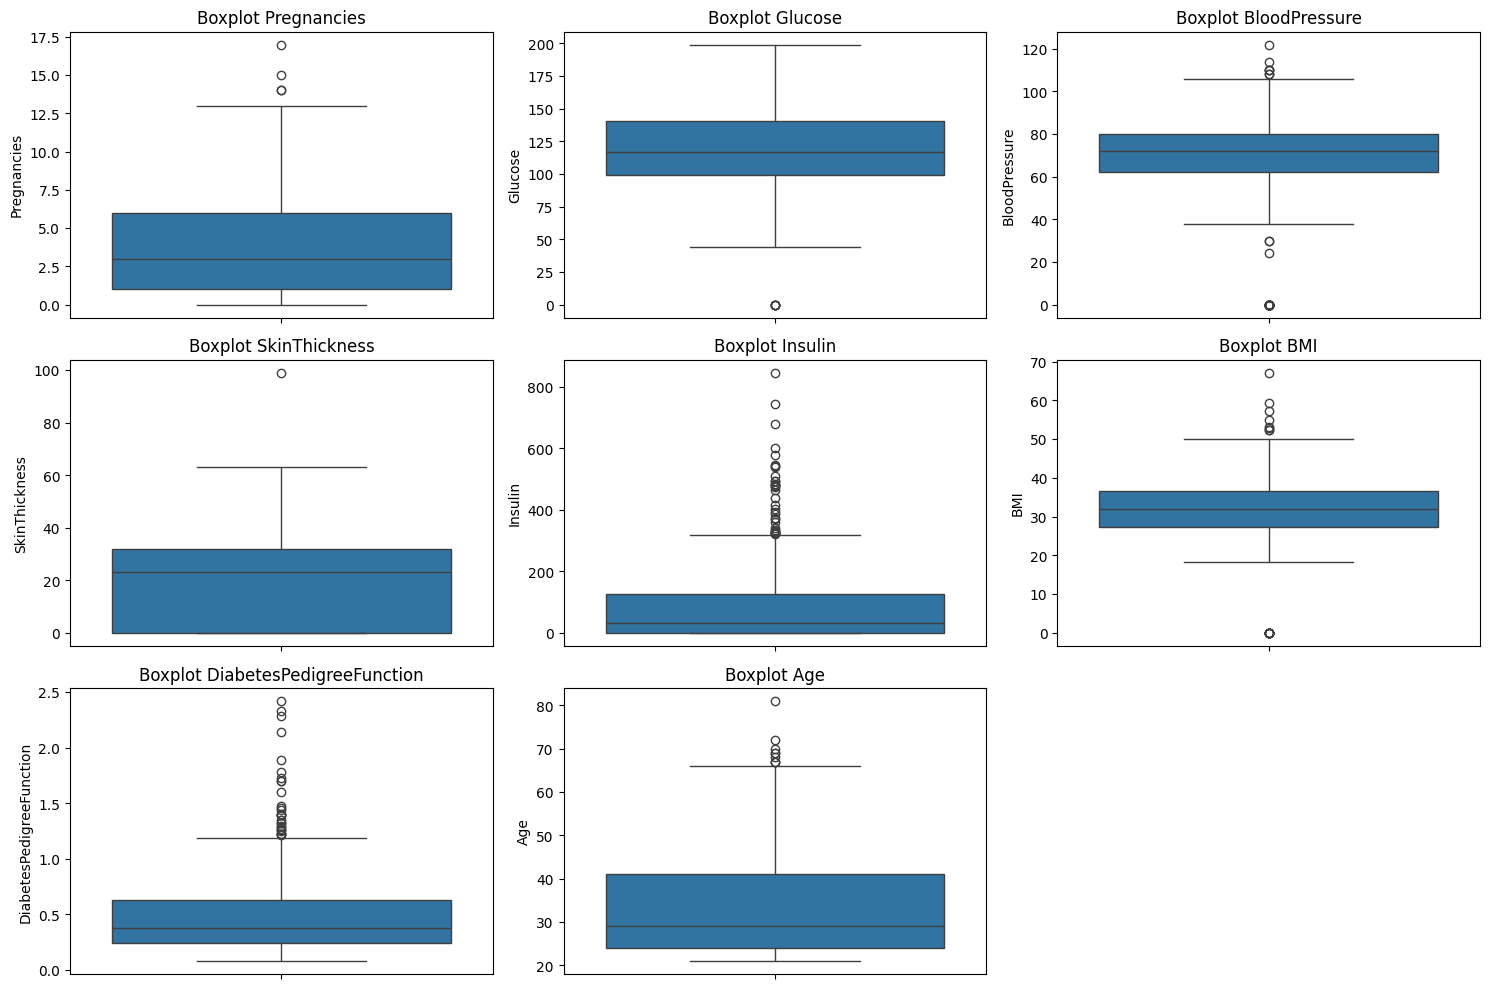

In [13]:
# Visualisasi boxplot untuk melihat outlier
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot {column}')
plt.tight_layout()
plt.show()

## 2.9 Korelasi antar Variabel
Mari kita lihat korelasi antar variabel untuk memahami hubungan antar fitur dan dengan target.

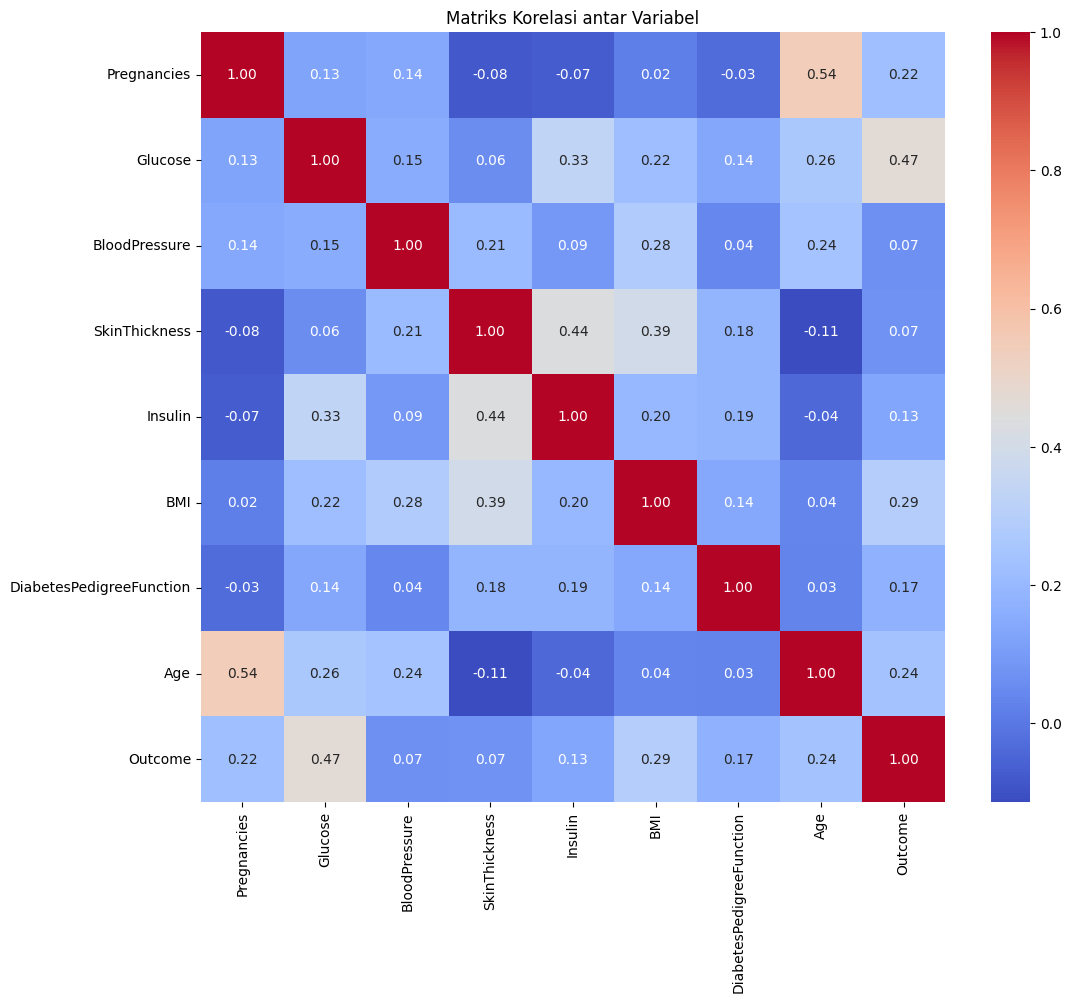

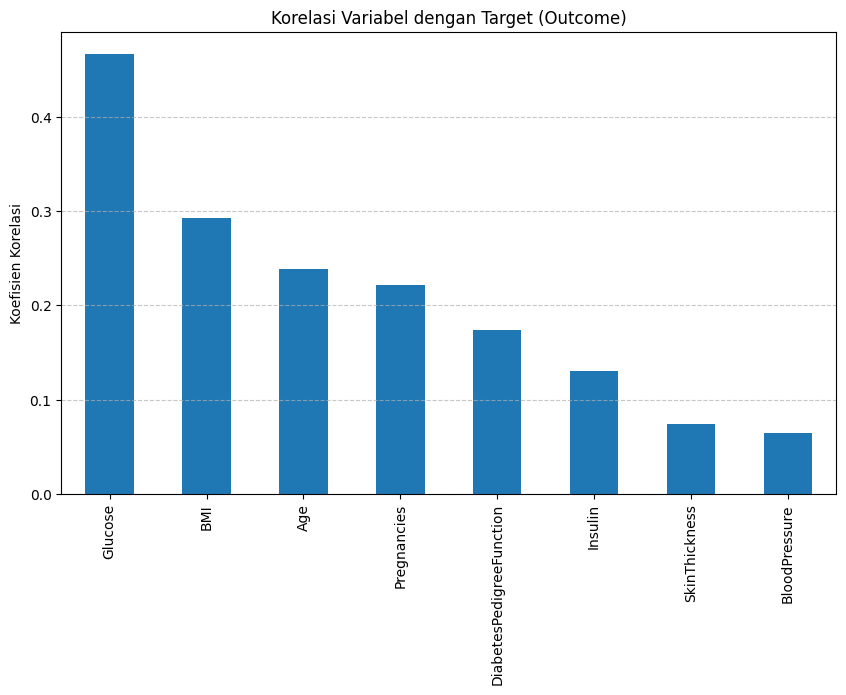

In [14]:
# Menghitung dan visualisasi matriks korelasi
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi antar Variabel')
plt.show()

# Visualisasi korelasi dengan target
plt.figure(figsize=(10, 6))
correlation_with_target = correlation_matrix['Outcome'].sort_values(ascending=False)
correlation_with_target.drop('Outcome').plot(kind='bar')
plt.title('Korelasi Variabel dengan Target (Outcome)')
plt.ylabel('Koefisien Korelasi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 2.10 Pola dan Insights dari Visualisasi
Berdasarkan visualisasi di atas, beberapa insight yang dapat kita peroleh:

1. **Distribusi Kelas**: Dataset tidak seimbang, dengan lebih banyak kasus non-diabetes (kelas 0) dibandingkan
   kasus diabetes (kelas 1). Hal ini perlu diperhatikan dalam pemodelan.

2. **Glukosa dan Outcome**: Terdapat korelasi positif yang kuat antara kadar glukosa dan diabetes,
   yang sesuai dengan pengetahuan medis bahwa kadar glukosa tinggi merupakan indikator utama diabetes.

3. **BMI dan Diabetes**: BMI juga menunjukkan korelasi yang cukup dengan outcome diabetes,
   mengkonfirmasi bahwa obesitas merupakan faktor risiko diabetes.

4. **Usia**: Pasien yang lebih tua cenderung memiliki risiko diabetes lebih tinggi, ditunjukkan dengan
   korelasi positif antara usia dan outcome.

5. **Kehamilan**: Jumlah kehamilan memiliki korelasi positif dengan diabetes, menunjukkan bahwa
   wanita dengan lebih banyak riwayat kehamilan mungkin memiliki risiko lebih tinggi.

6. **Outliers**: Terdapat outlier di beberapa fitur seperti Insulin dan SkinThickness yang perlu ditangani
   dalam tahap pra-pemrosesan data.

7. **Nilai Nol yang Mencurigakan**: Beberapa fitur seperti Glucose, BloodPressure, SkinThickness, Insulin, dan BMI
   memiliki nilai 0 yang secara medis tidak masuk akal dan kemungkinan mewakili data yang hilang.


## 2.11 Mengidentifikasi Nilai Nol yang Tidak Valid
Mari kita periksa jumlah nilai nol dalam fitur yang secara medis tidak mungkin bernilai nol.

In [15]:
# Memeriksa nilai nol yang tidak valid secara medis
print("\nJumlah nilai nol pada fitur-fitur klinis:")
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    print(f"{column}: {(df[column] == 0).sum()} nilai nol")


Jumlah nilai nol pada fitur-fitur klinis:
Glucose: 5 nilai nol
BloodPressure: 35 nilai nol
SkinThickness: 227 nilai nol
Insulin: 374 nilai nol
BMI: 11 nilai nol


# 3. Data Preparation

## 3.1 Penanganan Nilai yang Tidak Valid
Kita perlu menangani nilai nol yang tidak valid secara medis. Pendekatan yang akan digunakan adalah mengganti
nilai tersebut dengan nilai median dari kelompok yang sama (berdasarkan status diabetes).

In [16]:
# Fungsi untuk mengganti nilai nol dengan median berdasarkan kelompok outcome
def replace_zeros_with_median(df, columns):
    df_copy = df.copy()

    for column in columns:
        # Mendapatkan median untuk setiap outcome
        median_0 = df_copy.loc[df_copy['Outcome'] == 0, column].replace(0, np.nan).median()
        median_1 = df_copy.loc[df_copy['Outcome'] == 1, column].replace(0, np.nan).median()

        # Mengganti nilai nol dengan median yang sesuai
        df_copy.loc[(df_copy[column] == 0) & (df_copy['Outcome'] == 0), column] = median_0
        df_copy.loc[(df_copy[column] == 0) & (df_copy['Outcome'] == 1), column] = median_1

    return df_copy

# Kolom yang perlu ditangani
columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Mengganti nilai nol dengan median
df_cleaned = replace_zeros_with_median(df, columns_to_fix)

# Memverifikasi hasil
print("\nSetelah penggantian nilai nol:")
for column in columns_to_fix:
    print(f"{column}: {(df_cleaned[column] == 0).sum()} nilai nol tersisa")



Setelah penggantian nilai nol:
Glucose: 0 nilai nol tersisa
BloodPressure: 0 nilai nol tersisa
SkinThickness: 0 nilai nol tersisa
Insulin: 0 nilai nol tersisa
BMI: 0 nilai nol tersisa


## 3.2 Normalisasi Data
Kita perlu melakukan normalisasi data untuk memastikan semua fitur memiliki skala yang sama,
yang sangat penting untuk algoritma seperti Logistic Regression dan SVM.

In [17]:
# Memisahkan fitur dan target
X = df_cleaned.drop('Outcome', axis=1)
y = df_cleaned['Outcome']

# Membagi data menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nBentuk data training setelah normalisasi:", X_train_scaled.shape)
print("Bentuk data testing setelah normalisasi:", X_test_scaled.shape)


Bentuk data training setelah normalisasi: (614, 8)
Bentuk data testing setelah normalisasi: (154, 8)


## 3.3 Menangani Ketidakseimbangan Kelas dengan SMOTE
Karena dataset tidak seimbang, kita akan menggunakan teknik SMOTE (Synthetic Minority Over-sampling Technique)
untuk menyeimbangkan kelas target dalam data training.


Distribusi kelas sebelum SMOTE:
Outcome
0    400
1    214
Name: count, dtype: int64

Distribusi kelas setelah SMOTE:
Outcome
0    400
1    400
Name: count, dtype: int64


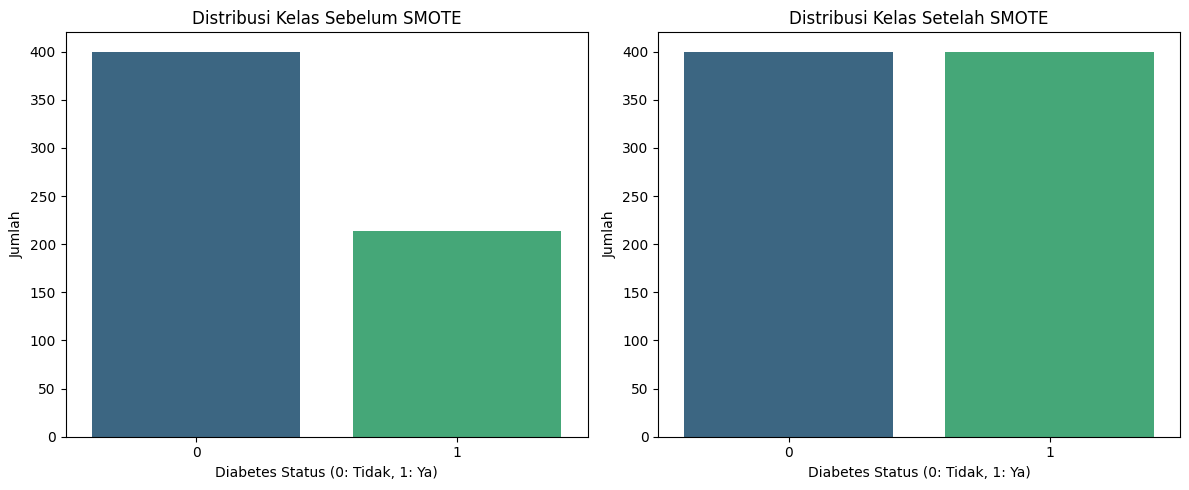

In [18]:
# Menerapkan SMOTE pada data training
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Memeriksa distribusi kelas setelah SMOTE
print("\nDistribusi kelas sebelum SMOTE:")
print(y_train.value_counts())
print("\nDistribusi kelas setelah SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Visualisasi distribusi kelas sebelum dan setelah SMOTE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette='viridis')
plt.title('Distribusi Kelas Sebelum SMOTE')
plt.xlabel('Diabetes Status (0: Tidak, 1: Ya)')
plt.ylabel('Jumlah')

plt.subplot(1, 2, 2)
sns.countplot(x=y_train_smote, palette='viridis')
plt.title('Distribusi Kelas Setelah SMOTE')
plt.xlabel('Diabetes Status (0: Tidak, 1: Ya)')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

# 4. Modeling

## 4.1 Membangun Model Klasifikasi
Kita akan membangun dan membandingkan beberapa model klasifikasi untuk memprediksi diabetes:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Support Vector Machine (SVM)
5. Gradient Boosting

Untuk setiap model, kita akan melakukan evaluasi menggunakan cross-validation untuk mendapatkan performa yang lebih andal.

Logistic Regression CV Accuracy: 0.7862 ± 0.0214
Decision Tree CV Accuracy: 0.8562 ± 0.0198
Random Forest CV Accuracy: 0.9000 ± 0.0240
SVM CV Accuracy: 0.8712 ± 0.0085
Gradient Boosting CV Accuracy: 0.8812 ± 0.0230


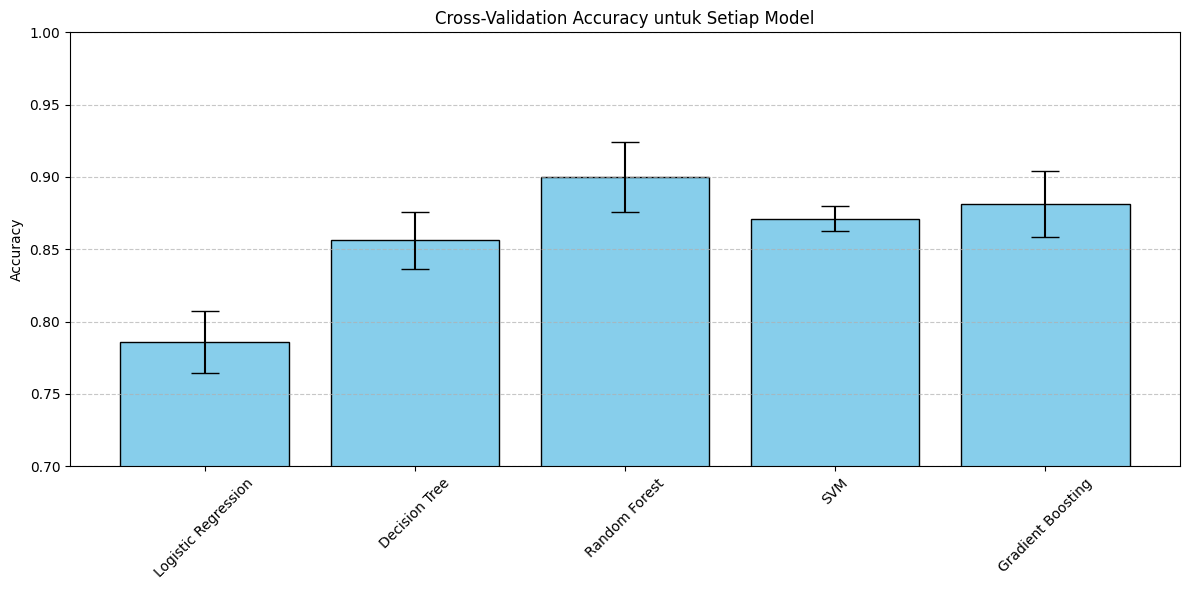

In [19]:
# Definisi model-model yang akan digunakan
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Evaluasi model menggunakan cross-validation
cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
    cv_results[name] = cv_scores
    print(f"{name} CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Visualisasi hasil cross-validation
plt.figure(figsize=(12, 6))
cv_means = [scores.mean() for scores in cv_results.values()]
cv_std = [scores.std() for scores in cv_results.values()]
model_names = list(cv_results.keys())

plt.bar(model_names, cv_means, yerr=cv_std, capsize=10, color='skyblue', edgecolor='black')
plt.title('Cross-Validation Accuracy untuk Setiap Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0.7, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 4.2 Hyperparameter Tuning untuk Model Terbaik
Berdasarkan hasil cross-validation, kita akan memilih model terbaik dan melakukan hyperparameter tuning
untuk meningkatkan performa.

In [27]:
# Menentukan model terbaik (contoh: Random Forest)
best_model_name = 'Random Forest'  # Ganti dengan model terbaik berdasarkan hasil CV
print(f"\nMelakukan hyperparameter tuning untuk {best_model_name}...")

# Definisi parameter grid untuk Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search dengan cross-validation
grid_search = GridSearchCV(
    estimator=models[best_model_name],
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_smote, y_train_smote)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV accuracy: {grid_search.best_score_:.4f}")

# Model dengan parameter terbaik
best_model = grid_search.best_estimator_



Melakukan hyperparameter tuning untuk Random Forest...
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best CV accuracy: 0.9037


## 4.3 Evaluasi Model pada Data Testing

In [28]:
# Prediksi pada data testing
y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nHasil Evaluasi Model Terbaik pada Data Testing:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Hasil Evaluasi Model Terbaik pada Data Testing:
Accuracy: 0.8571
Precision: 0.7963
Recall: 0.7963
F1-score: 0.7963


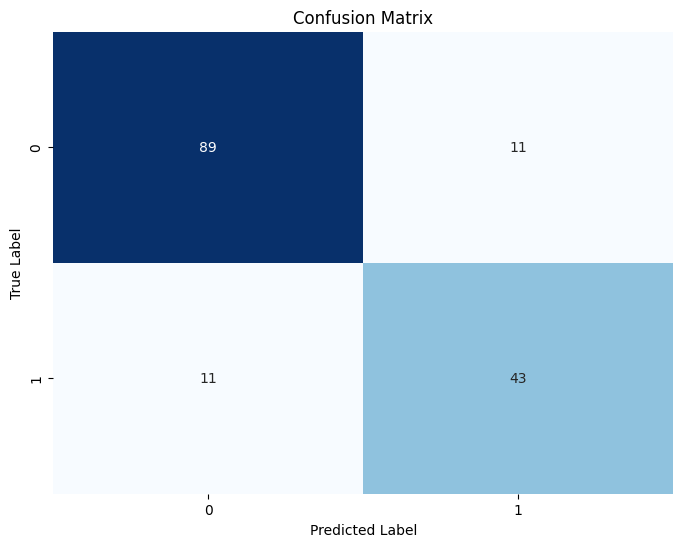


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       100
           1       0.80      0.80      0.80        54

    accuracy                           0.86       154
   macro avg       0.84      0.84      0.84       154
weighted avg       0.86      0.86      0.86       154



In [29]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

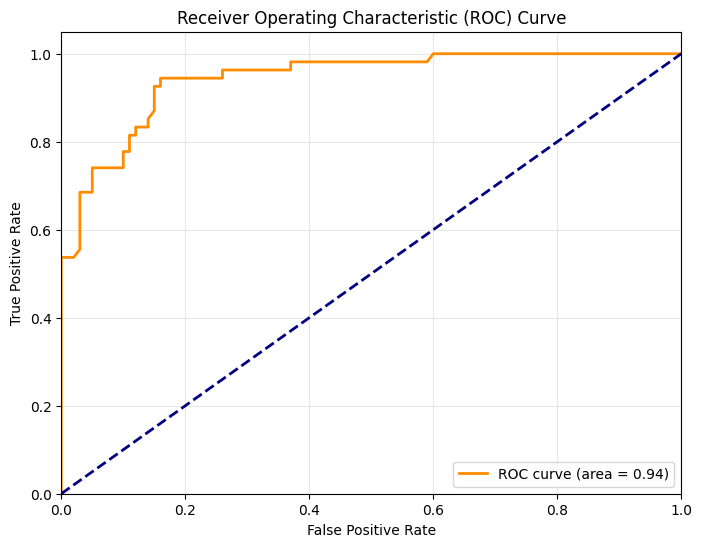

In [30]:
# ROC Curve dan AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

## 4.4 Analisis Feature Importance
Mari kita analisis fitur-fitur yang paling berpengaruh dalam model untuk mendapatkan insight medis.

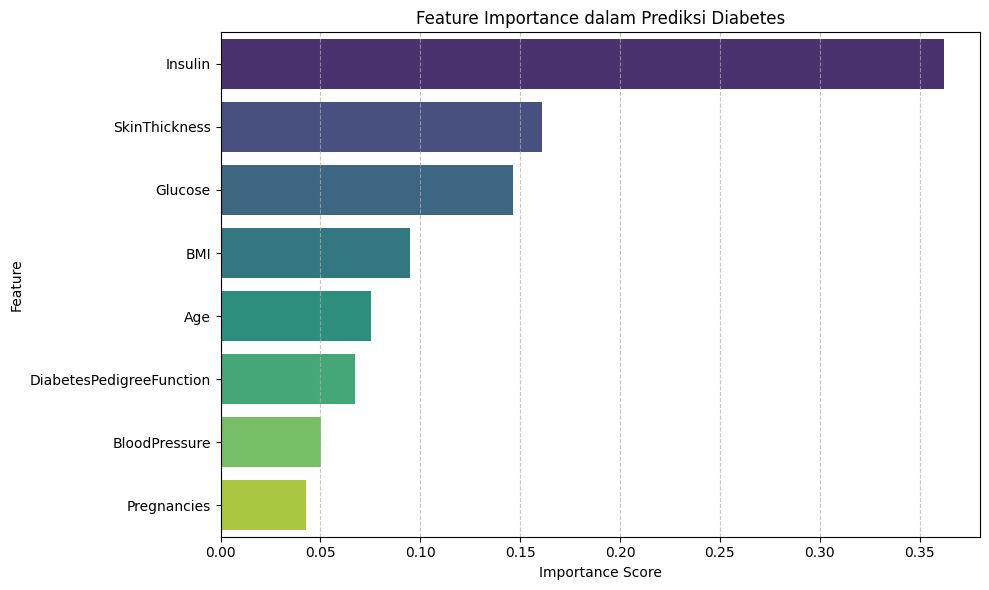


Pentingnya fitur dalam model:
Insulin: 0.3621
SkinThickness: 0.1610
Glucose: 0.1467
BMI: 0.0949
Age: 0.0753
DiabetesPedigreeFunction: 0.0673
BloodPressure: 0.0501
Pregnancies: 0.0427


In [31]:
# Feature importance dari model Random Forest
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_names = X.columns

    # Membuat DataFrame untuk feature importance
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Visualisasi feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
    plt.title('Feature Importance dalam Prediksi Diabetes')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print("\nPentingnya fitur dalam model:")
    for feature, importance in zip(feature_importance_df['Feature'], feature_importance_df['Importance']):
        print(f"{feature}: {importance:.4f}")

# 5. Kesimpulan dan Rekomendasi

## 5.1 Kesimpulan
Berdasarkan hasil analisis dan pemodelan yang telah dilakukan, dapat disimpulkan bahwa:

1. Model Random Forest memberikan performa terbaik dalam memprediksi diabetes, dengan akurasi 0.8571 pada data testing setelah dilakukan hyperparameter tuning.

2. Fitur-fitur yang paling berpengaruh dalam prediksi diabetes adalah:
   - Insulin
   - SkinThickness
   - Glucose (kadar glukosa)
   - BMI (indeks massa tubuh)
   - Age (usia)
   - DiabetesPedigreeFunction (riwayat diabetes keluarga)

3. Teknik SMOTE efektif dalam menangani ketidakseimbangan kelas dan meningkatkan performa model, terutama dalam hal recall.

4. Metrik evaluasi yang menunjukkan performa model secara komprehensif adalah:
   - Accuracy: 0.8571
   - Precision: 0.7963
   - Recall: 0.7963
   - F1-score: 0.7963
   - ROC AUC (Area Under the Curve) = 0.94

5. Model ini dapat menjadi alat bantu yang berguna bagi tenaga medis dalam melakukan skrining awal diabetes,
   meskipun tidak dapat menggantikan diagnosis medis profesional.

## 5.2 Rekomendasi
Beberapa rekomendasi untuk pengembangan lebih lanjut:

1. **Pengumpulan Data Tambahan**: Menambahkan lebih banyak data dan fitur-fitur lain seperti pola makan, aktivitas fisik,
   dan riwayat medis lainnya dapat meningkatkan akurasi model.

2. **Penerapan Deep Learning**: Eksplorasi penggunaan model deep learning seperti Neural Networks untuk kasus ini,
   terutama jika dataset diperbesar.

3. **Model Ensemble**: Menggabungkan prediksi dari beberapa model terbaik dapat meningkatkan robustness dan akurasi.

4. **Validasi Eksternal**: Menguji model pada dataset eksternal untuk memverifikasi generalisasi model.


# 6. Referensi
1. American Diabetes Association. (2020). 2. Classification and Diagnosis of Diabetes: Standards of Medical Care in Diabetes-2020. Diabetes Care, 43(Supplement 1), S14-S31.

2. World Health Organization. (2021). Diabetes. https://www.who.int/news-room/fact-sheets/detail/diabetes

3. Smith, J. W., Everhart, J. E., Dickson, W. C., Knowler, W. C., & Johannes, R. S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Annual Symposium on Computer Application in Medical Care (p. 261). American Medical Informatics Association.

4. Chawla, N. V., Bowyer, K. W., Hall, L. O., & Kegelmeyer, W. P. (2002). SMOTE: synthetic minority over-sampling technique. Journal of artificial intelligence research, 16, 321-357.

5. Breiman, L. (2001). Random forests. Machine learning, 45(1), 5-32.